In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql

In [2]:
hrdata=pd.read_csv(r'C:\Users\Dlc\vamsi munagala\HR_Data.csv',header=0)
hrdata_bk = hrdata.copy()
hrdata.head()

,Emp_ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,HP848558,0.38,0.53,2,157,3,0,1,0,sales,low
1,XI670193,0.80,0.86,5,262,6,0,1,0,sales,medium
2,JL543548,0.11,0.88,7,272,4,0,1,0,sales,medium
3,DF138032,0.72,0.87,5,223,5,0,1,0,sales,low
4,KD453613,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_ID                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [4]:
hrdata_dup = hrdata[hrdata.duplicated(keep='last')]
hrdata_dup

,Emp_ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [5]:
del hrdata['Emp_ID']

In [6]:
hrdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
cols1 = ['Department','salary']
cols2 = ['sartisfaction_level','last_evaluation','number_project','average_monthly_hours','time_speed_company']

In [8]:
hrdata['Department'].value_counts

<bound method IndexOpsMixin.value_counts of 0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: Department, Length: 14999, dtype: object>

In [9]:
hrdata['salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object>

In [10]:
hrdata = pd.get_dummies(hrdata, columns=cols1)
hrdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [11]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  uint8  
 9   Department_RandD        14999 non-null  uint8  
 10  Department_accounting   14999 non-null  uint8  
 11  Department_hr           14999 non-null  uint8  
 12  Department_management   14999 non-null  uint8  
 13  Department_marketing    14999 non-null  uint8  
 14  Department_product_mng  14999 non-null

In [12]:
IndepVar=[]
for col in hrdata.columns:
    if col!='left':
        IndepVar.append(col)
        
TargetVar='left'

x=hrdata[IndepVar]
y=hrdata[TargetVar]
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
## Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10499, 20), (4500, 20), (10499,), (4500,))

In [14]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [15]:
EMResults=pd.read_csv(r"C:\Users\Dlc\vamsi munagala\EMResults.csv",header=0)
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Confusion matrix : 
 [[1010   62]
 [  21 3407]]
Outcome values : 
 1010 62 21 3407
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.94      0.96      1072
           0       0.98      0.99      0.99      3428

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

Accuracy : 98.2 %
Precision : 98.0 %
Recall : 94.2 %
F1 Score : 0.961
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 96.8 %
MCC : 0.949
roc_auc_score: 0.968


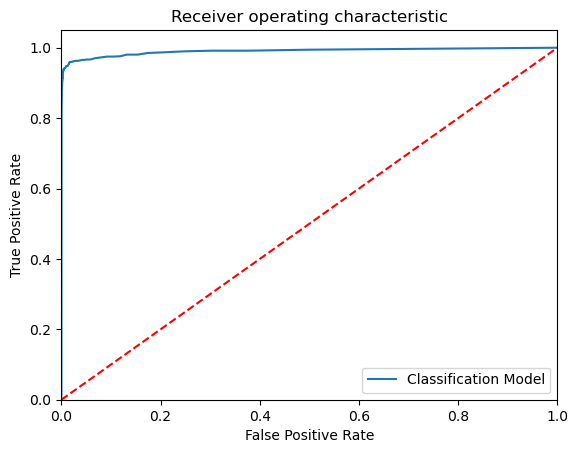

-----------------------------------------------------------------------------------------------------
Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 361  711]
 [ 256 3172]]
Outcome values : 
 361 711 256 3172
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.34      0.43      1072
           0       0.82      0.93      0.87      3428

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500

Accuracy : 78.5 %
Precision : 58.5 %
Recall : 33.7 %
F1 Score : 0.427
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 63.1 %
MCC : 0.325
roc_auc_score: 0.631


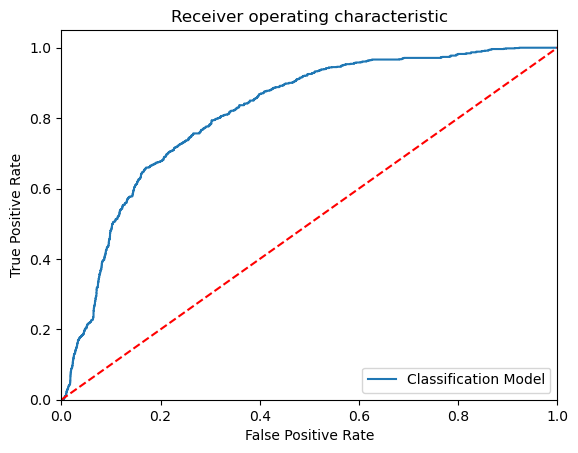

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1029   43]
 [  75 3353]]
Outcome values : 
 1029 43 75 3353
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.96      0.95      1072
           0       0.99      0.98      0.98      3428

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500

Accuracy : 97.4 %
Precision : 93.2 %
Recall : 96.0 %
F1 Score : 0.946
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 96.9 %
MCC : 0.929
roc_auc_score: 0.969


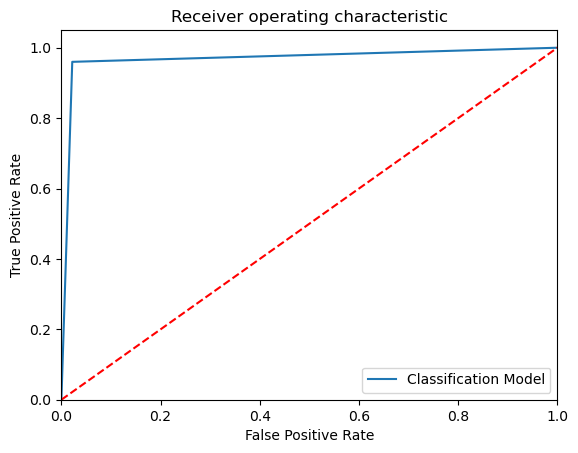

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1020   52]
 [  11 3417]]
Outcome values : 
 1020 52 11 3417
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.95      0.97      1072
           0       0.99      1.00      0.99      3428

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy : 98.6 %
Precision : 98.9 %
Recall : 95.1 %
F1 Score : 0.97
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 97.4 %
MCC : 0.961
roc_auc_score: 0.974


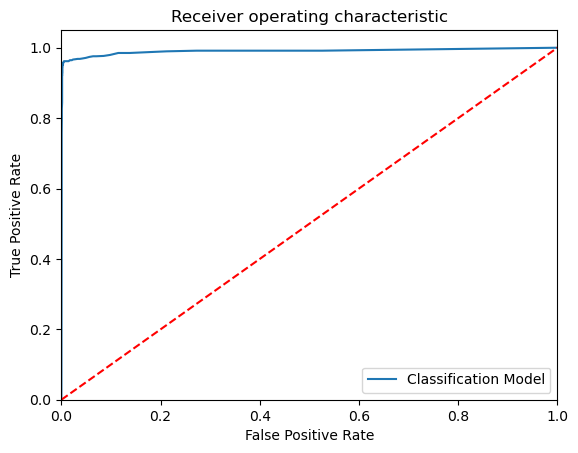

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1008   64]
 [  22 3406]]
Outcome values : 
 1008 64 22 3406
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.94      0.96      1072
           0       0.98      0.99      0.99      3428

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

Accuracy : 98.1 %
Precision : 97.9 %
Recall : 94.0 %
F1 Score : 0.959
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 96.7 %
MCC : 0.947
roc_auc_score: 0.967


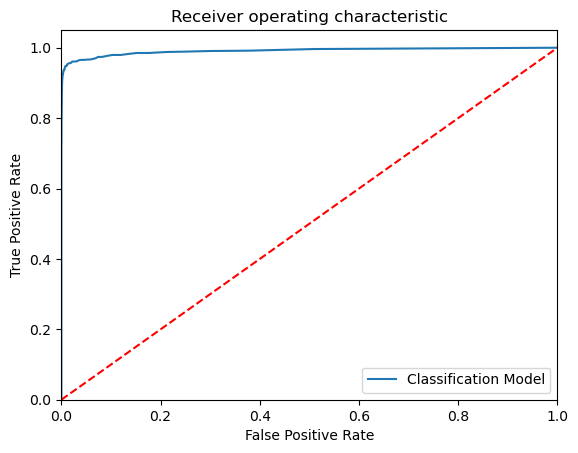

-----------------------------------------------------------------------------------------------------


In [16]:
#==Step_01=============================================================================================================>

# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for Extra Trees Classifier 

ModelET = ExtraTreesClassifier()

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual, predicted, labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelET.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

#==Step_02=============================================================================================================>

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
#ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [17]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),361,711,256,3172,0.785,0.585,0.337,0.427,0.925,0.325,0.631037,0.631
1,DecisionTreeClassifier(),1029,43,75,3353,0.974,0.932,0.960,0.946,0.978,0.929,0.969005,0.969
2,"(DecisionTreeClassifier(max_features='auto', r...",1020,52,11,3417,0.986,0.989,0.951,0.970,0.997,0.961,0.974142,0.974
3,"(ExtraTreeClassifier(random_state=576329592), ...",1008,64,22,3406,0.981,0.979,0.940,0.959,0.994,0.947,0.966940,0.967


In [18]:
# Create a list for plotting the decision trees

figcols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
           'Work_accident', 'promotion_last_5years', 'Department_IT', 'Department_RandD', 'Department_accounting',
           'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales',
           'Department_support', 'Department_technical', 'salary_high', 'salary_low', 'salary_medium']


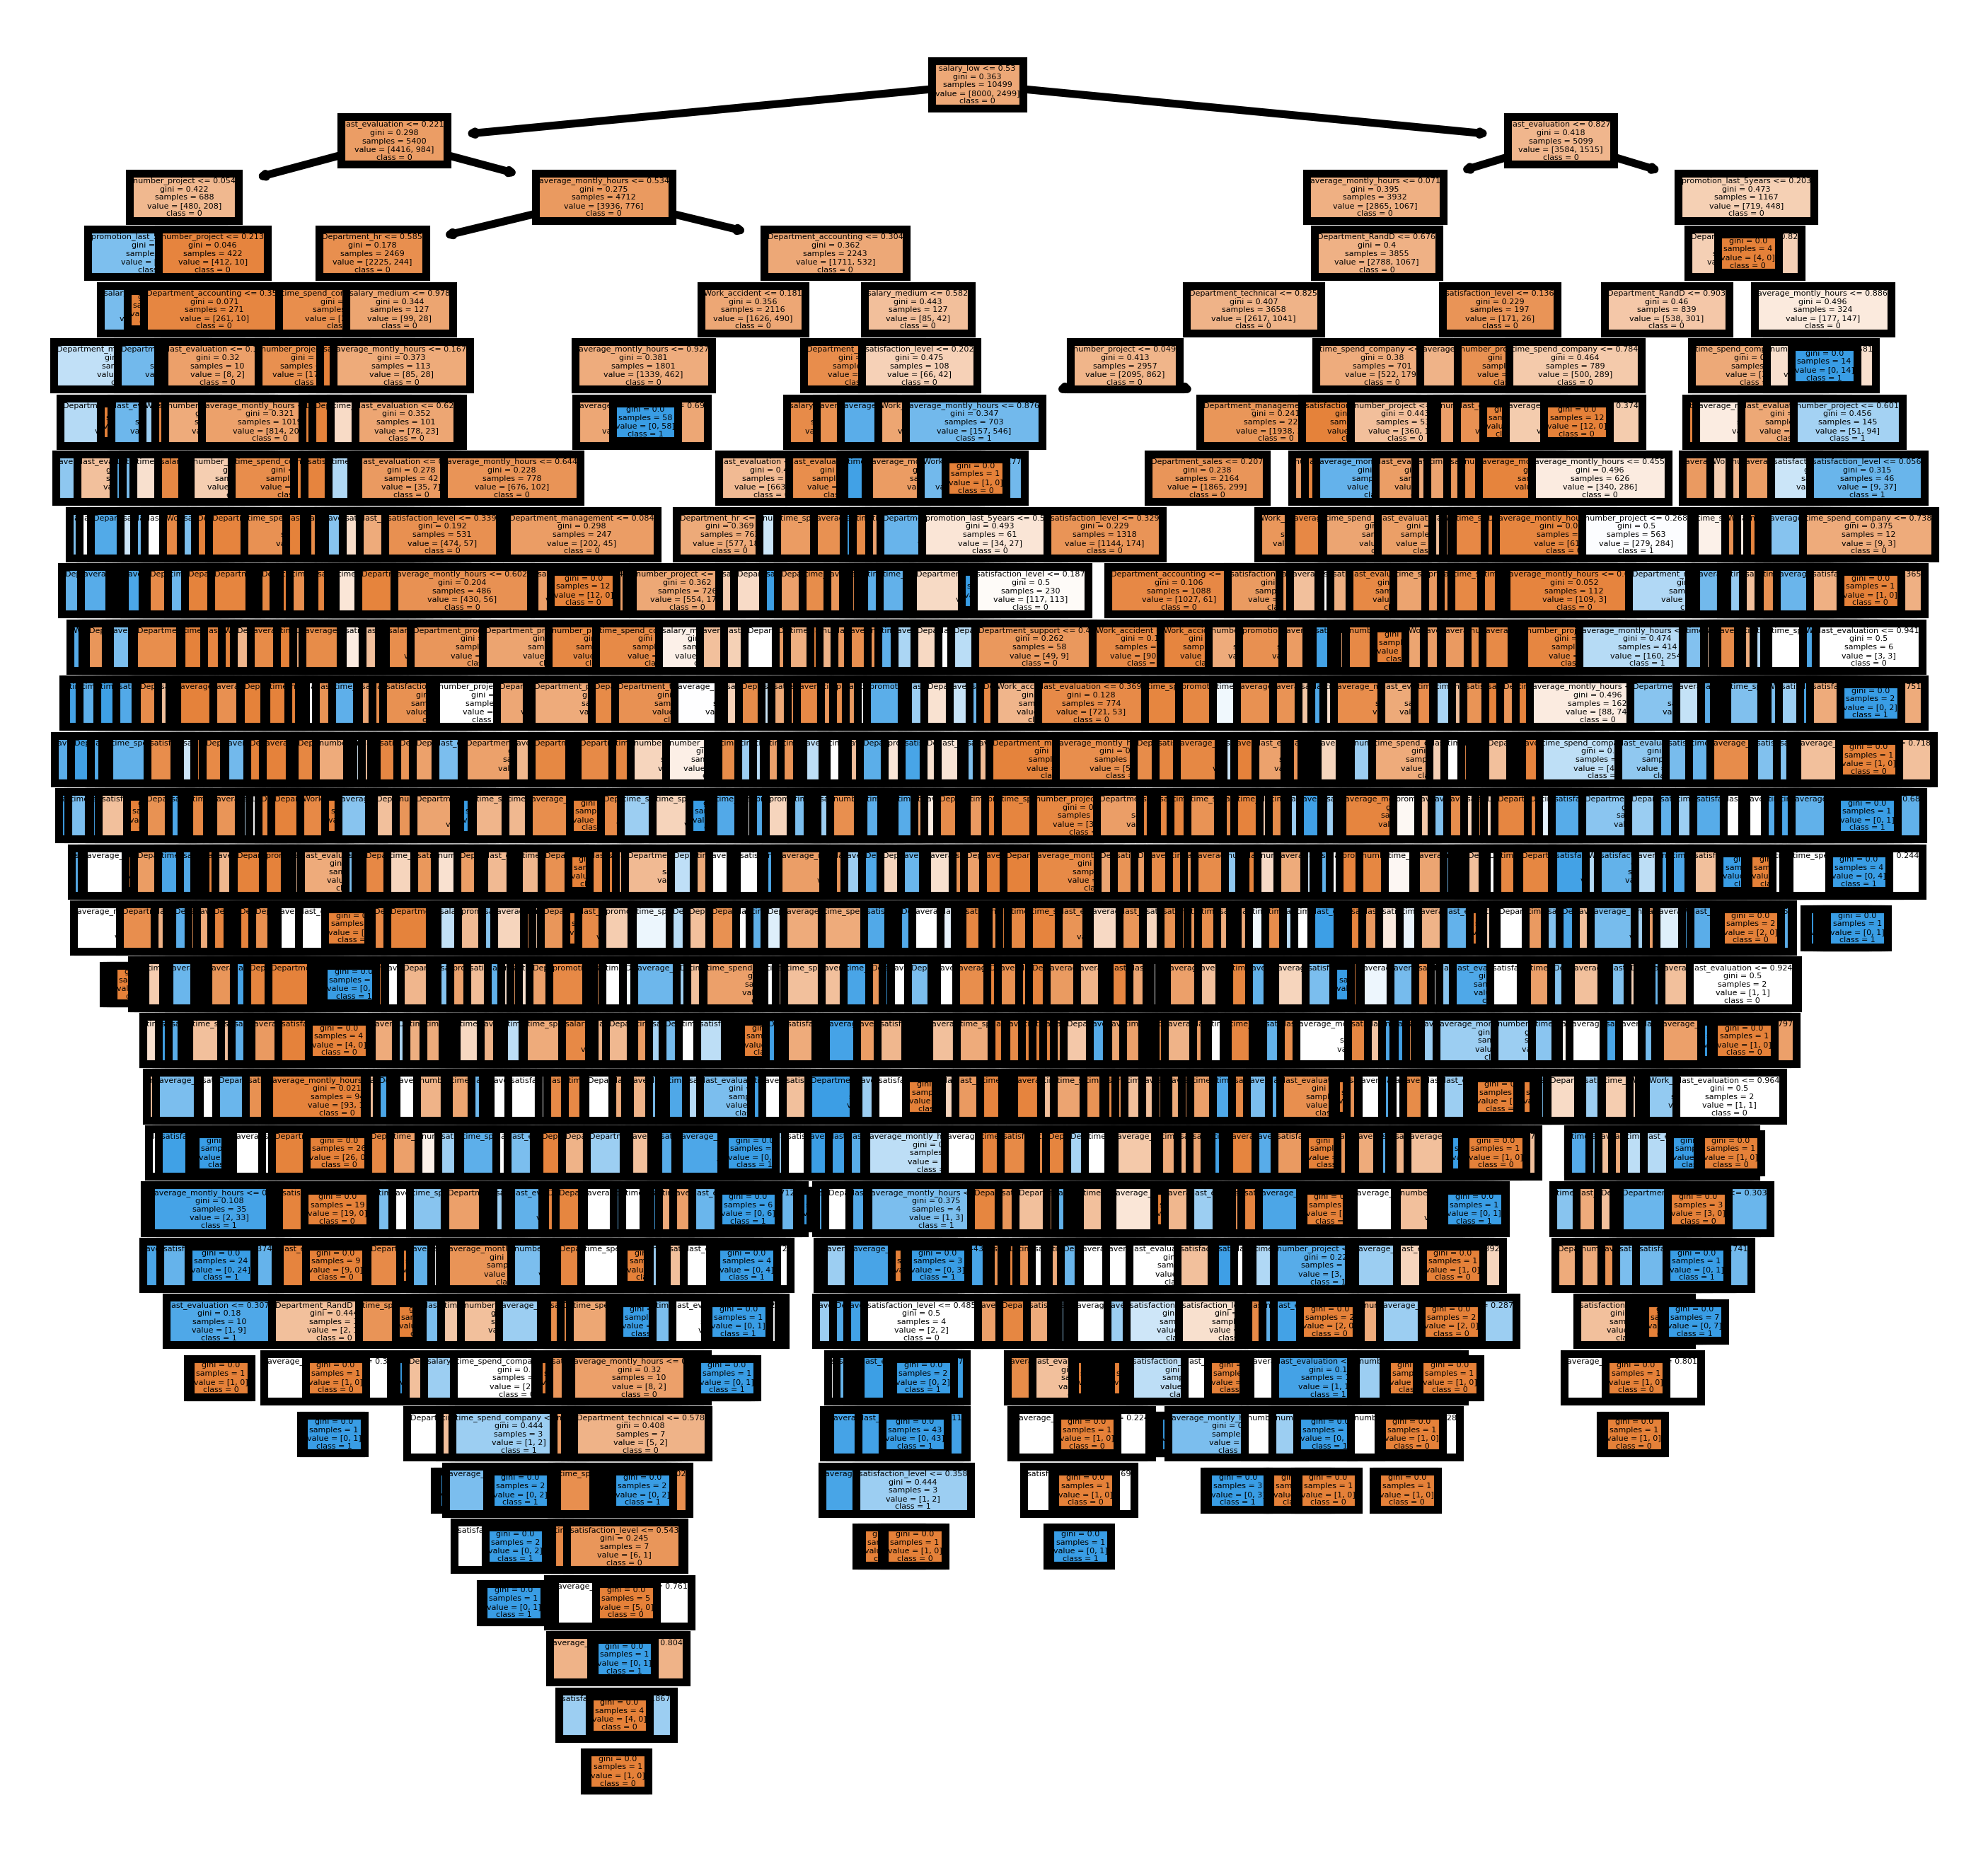

In [19]:
# Visualize individual trees and code below visualizes the first decision tree of Extra Trees Classifier

from sklearn import tree

fn1=figcols
cn1=['0', '1']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=800)
tree.plot_tree(ModelET.estimators_[0],
               feature_names = fn1, 
               class_names=cn1,
               filled = True);
#fig.savefig('ModelET.png')


In [20]:
# Visualize individual trees and code below visualizes the first 5 decision trees of Extra Trees Classifier

from sklearn import tree

fn2=figcols
cn2=['0', '1']

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(ModelET.estimators_[index],
                   feature_names = fn2, 
                   class_names=cn2,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('ModelET1.png')
